In [35]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
import os
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk

## 1. Spojenie všetkých csv súborov do jedného  

In [2]:
joined_files = os.path.join("results-eval_final/", "*.csv")

In [3]:
joined_list = glob.glob(joined_files)

In [5]:
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [6]:
df

,Unnamed: 0,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category,manual eval
0,0,"OK, so task number one.",ok task number one,0.500000,0.636,0.00,0.364,0.3612,Positive,NaN,Neutral
1,3,OK.,ok,0.500000,1.000,0.00,0.000,0.2960,Positive,NaN,Positive
2,4,So there is no.,no,0.000000,0.000,1.00,0.000,-0.2960,Negative,NaN,Negative
3,5,Uhm?,uhm,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Neutral
4,6,Tabs.,tabs,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
4978,593,"Uh, I would have given four or five maybe, but...",uh would give four five maybe couple negative ...,0.400000,0.000,0.27,0.730,-0.5719,Negative,NaN,Negative
4979,594,How did you feel about obtaining the obtaining...,feel obtain obtain information gay get also th...,0.427778,0.000,0.00,1.000,0.0000,Neutral,NaN,Negative
4980,595,Scribe understand what the understandable.,scribe understand understandable,0.000000,0.600,0.00,0.400,0.4588,Positive,NaN,Positive
4981,596,"Also, I give it three because some things made...",also give three thing make sense,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Positive


## 2. Analýza výsledkov

### 2.1 Filtrovanie výsledkov podľa polarity

In [43]:
# Usporiadenie pozitívnych viet podľa najvyššieho vader-compound skóre 
df_vader_pos = df.loc[df['vader-polarity'] == 'Positive'].sort_values(by='vader-compound', ascending=False)
# Spracovanie do textovej formy
text_pos = df_vader_pos['Sentence'].values

# Top 100 najpozitívnejších viet zoradených podľa vader-compound skóre
df_vader_pos_top100 = df_vader_pos.head(100)
# Spracovanie do textovej formy
text_pos_top100 = df_vader_pos_top10['Sentence'].values

In [44]:
# Usporiadenie negatívnych viet podľa najnižšieho vader-compound skóre 
df_vader_neg = df.loc[df['vader-polarity'] == 'Negative'].sort_values(by='vader-compound')
# Spracovanie do textovej formy
text_neg = df_vader_neg['Sentence'].values

# Top 100 najnegatívnejších viet zoradených podľa vader-compound skóre
df_vader_neg_top100 = df_vader_neg.head(100)
# Spracovanie do textovej formy
text_neg_top100 = df_vader_neg_top10['Sentence'].values

In [45]:
# Spracovanie do reťazca, aby sme mohli vytvoriť mrak slov
text_pos = ''.join(text_pos)
text_pos_top100 = ''.join(text_pos_top10)
text_neg = ''.join(text_neg)
text_neg_top100 = ''.join(text_neg_top10)

#### Mrak slov pre všetky slová z pozitívnych viet

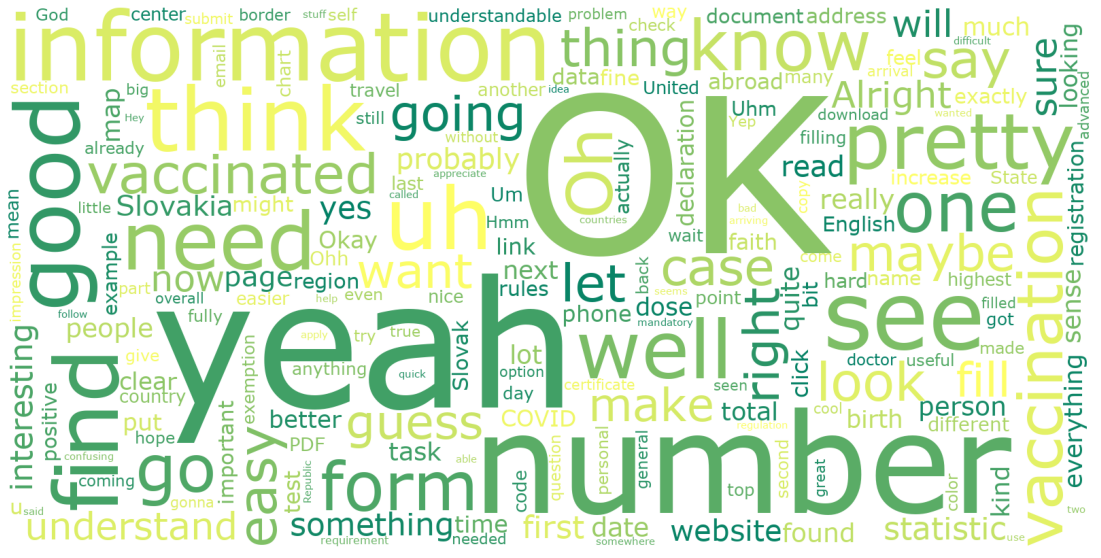

In [31]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1600,
                            height = 800,
                            colormap='summer',
                            collocations=False
                            ).generate(text_pos)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Mrak slov pre slová z top 100 pozitívnych viet

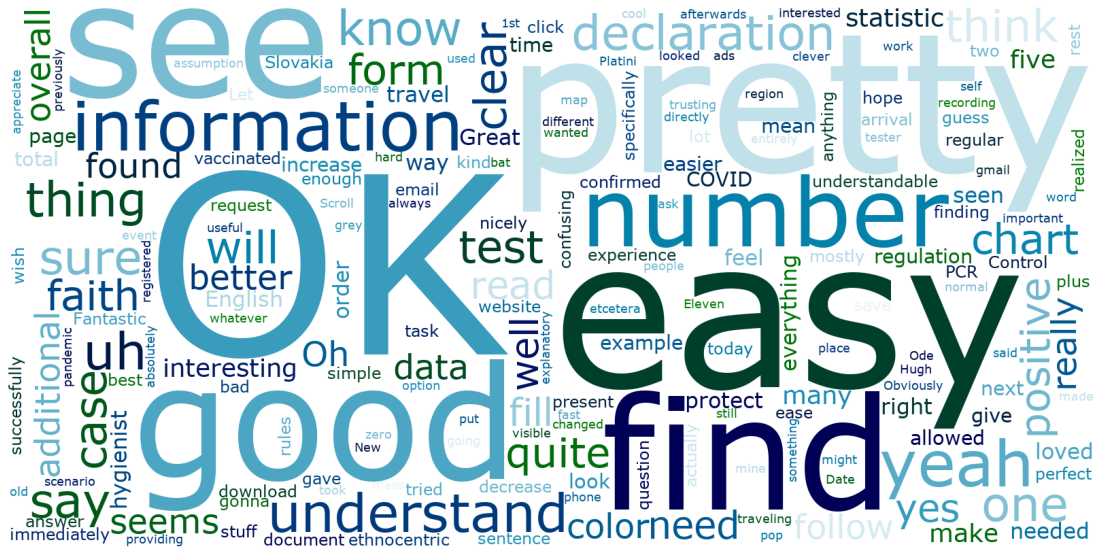

In [32]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1600,
                            height = 800,
                            colormap='ocean',
                            collocations=False
                            ).generate(text_pos_top10)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Mrak slov pre všetky slová z negatívnych viet

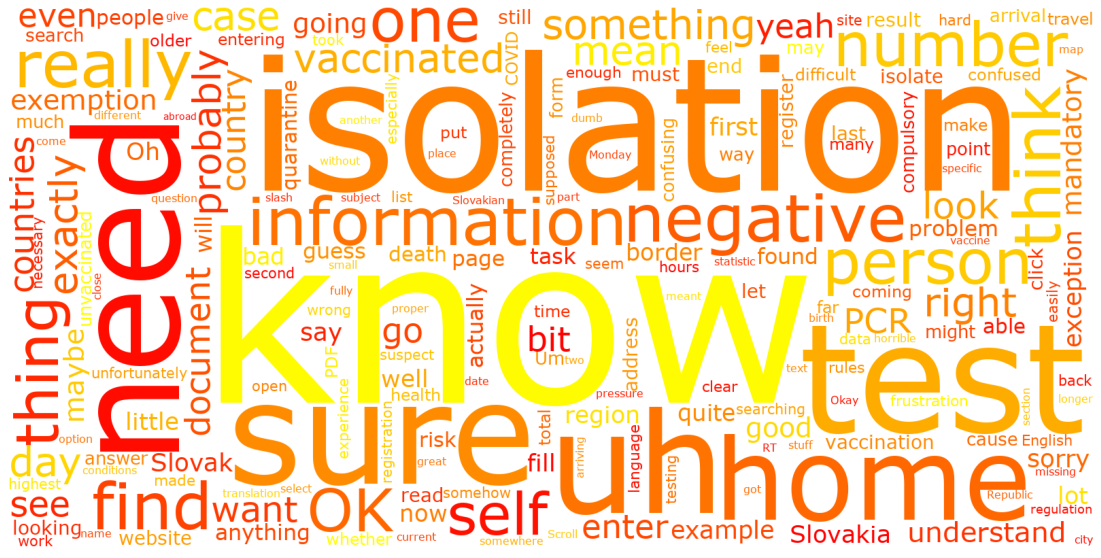

In [33]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1600,
                            height = 800,
                            colormap='autumn',
                            collocations=False
                            ).generate(text_neg)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Mrak slov pre slová z top 100 negatívnych viet

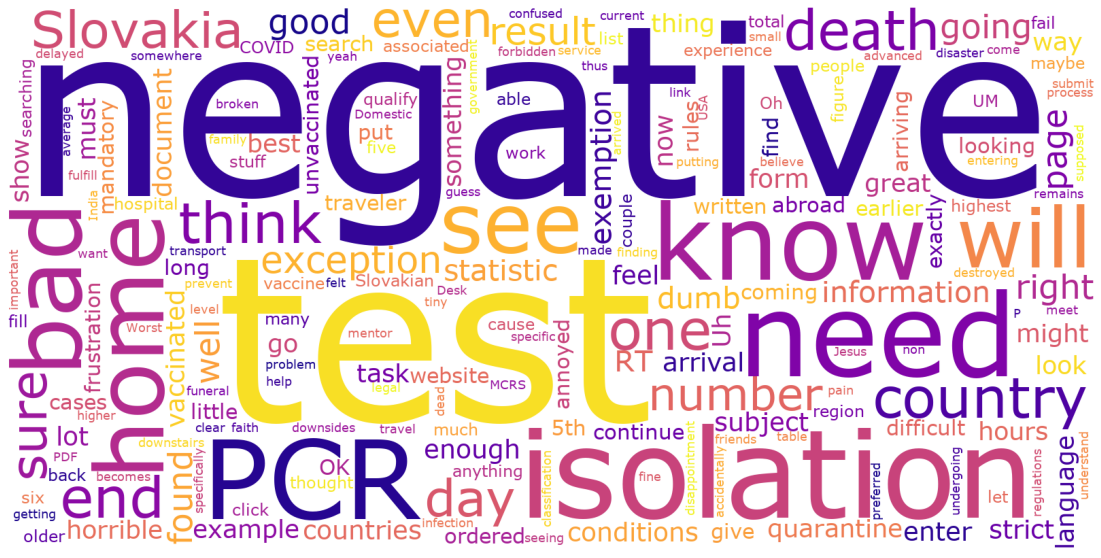

In [34]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1600,
                            height = 800,
                            colormap='plasma',
                            collocations=False
                            ).generate(text_neg_top10)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.2 Histogramy a početnosť 

<AxesSubplot:title={'center':'Vader predikované hodnoty'}>

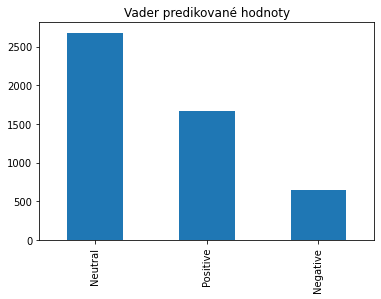

In [50]:
df['vader-polarity'].value_counts().plot(kind='bar', title='Vader predikované hodnoty')

<AxesSubplot:title={'center':'Manuálne vyhodnotené hodnoty'}>

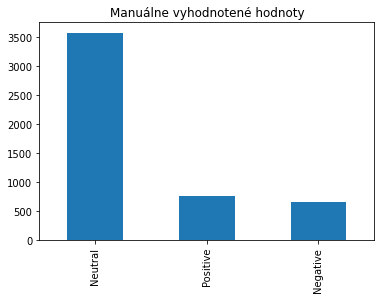

In [51]:
df['manual eval'].value_counts().plot(kind='bar', title='Manuálne vyhodnotené hodnoty')

In [39]:
print(df.count())
print('------')
print('Počty pre VADER')
print(df['vader-polarity'].value_counts())
print('------')
print('Počty pre manuálne hodnotenie')
print(df['manual eval'].value_counts())

Unnamed: 0                4983
Sentence                  4983
Pre-processed sentence    4785
textblob-subjectivity     4983
vader-pos                 4983
vader-neg                 4983
vader-neu                 4983
vader-compound            4983
vader-polarity            4983
sentiment-category         153
manual eval               4983
dtype: int64
------
Neutral     2677
Positive    1664
Negative     642
Name: vader-polarity, dtype: int64
------
Neutral     3574
Positive     754
Negative     655
Name: manual eval, dtype: int64


## 3. Matica zmätenia 

In [26]:
cm = pd.crosstab(df['manual eval'], df['vader-polarity'], rownames=['manual eval actual'], colnames=['vader-polarity predicted'])

In [27]:
cm

vader-polarity predicted,Negative,Neutral,Positive
manual eval actual,,,
Negative,415,99,141
Neutral,223,2512,839
Positive,4,66,684


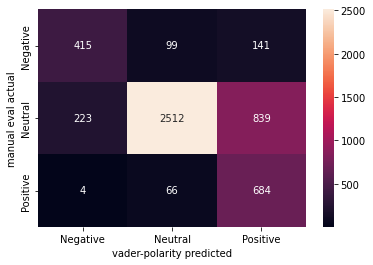

In [28]:
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [29]:
actual = df['manual eval'].tolist()
predicted = df['vader-polarity'].tolist()

In [30]:
metrics = classification_report(actual,predicted)
print('Classification report : \n',metrics)

Classification report : 
               precision    recall  f1-score   support

    Negative       0.65      0.63      0.64       655
     Neutral       0.94      0.70      0.80      3574
    Positive       0.41      0.91      0.57       754

    accuracy                           0.72      4983
   macro avg       0.67      0.75      0.67      4983
weighted avg       0.82      0.72      0.75      4983

